In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [13]:
from PIL import Image

img = Image.fromarray(x_train[0])
img.save('../images/mnist_5.png')

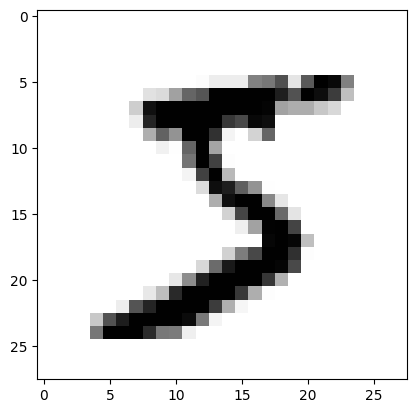

In [10]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [4]:
x_train = (x_train / 255.).round()
x_test = (x_test / 255.).round()

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(80, activation='sigmoid'),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7528 - loss: 0.9838
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9373 - loss: 0.2217
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9549 - loss: 0.1537
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9657 - loss: 0.1161
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.0897
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0685
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9848 - loss: 0.0556


In [68]:
i = 2
prediction = model.predict(x_test[i:i+1])
print(prediction)
print(prediction.argmax(), prediction.max())
print(y_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.00171844 0.9988564  0.06527363 0.00402979 0.12411496 0.00424938
  0.0818058  0.11180668 0.08716867 0.00696391]]
1 0.9988564
1


In [51]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9543 - loss: 0.1790


[0.14899873733520508, 0.9611999988555908]

In [70]:
model.save('../models/mymodel.keras')

In [71]:
m = tf.keras.models.load_model('../models/mymodel.keras')

d:\Python\Projects\ml\env\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [72]:
i = 2
prediction = m.predict(x_test[i:i+1])
print(prediction)
print(prediction.argmax(), prediction.max())
print(y_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.00171844 0.9988564  0.06527363 0.00402979 0.12411496 0.00424938
  0.0818058  0.11180668 0.08716867 0.00696391]]
1 0.9988564
1


NameError: name 'model' is not defined